Mic A Audio:


Mic B Audio (Delayed):


(553725,)
(276863,)
(276863,)
Estimated time shift (samples): -501
Estimated time shift: -0.010438 seconds
Mic B Audio (Phase Aligned):


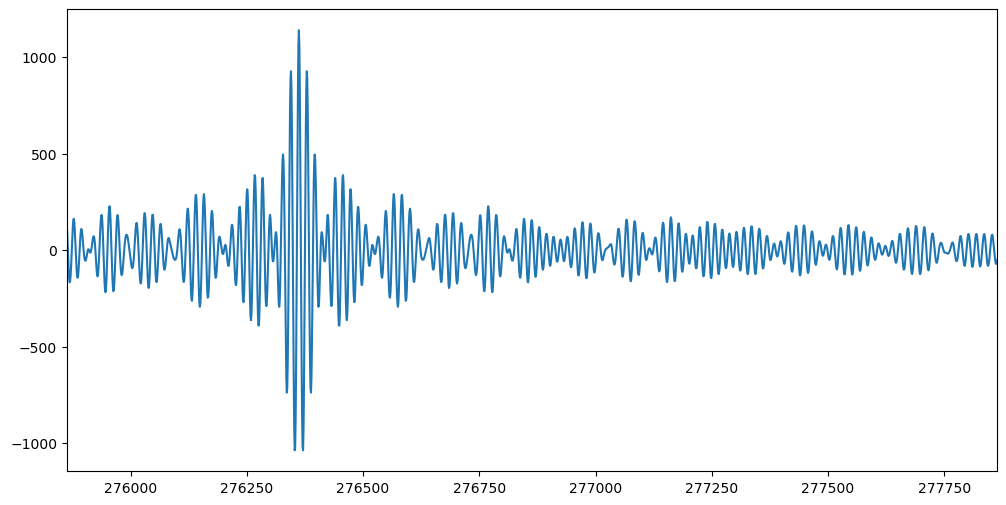

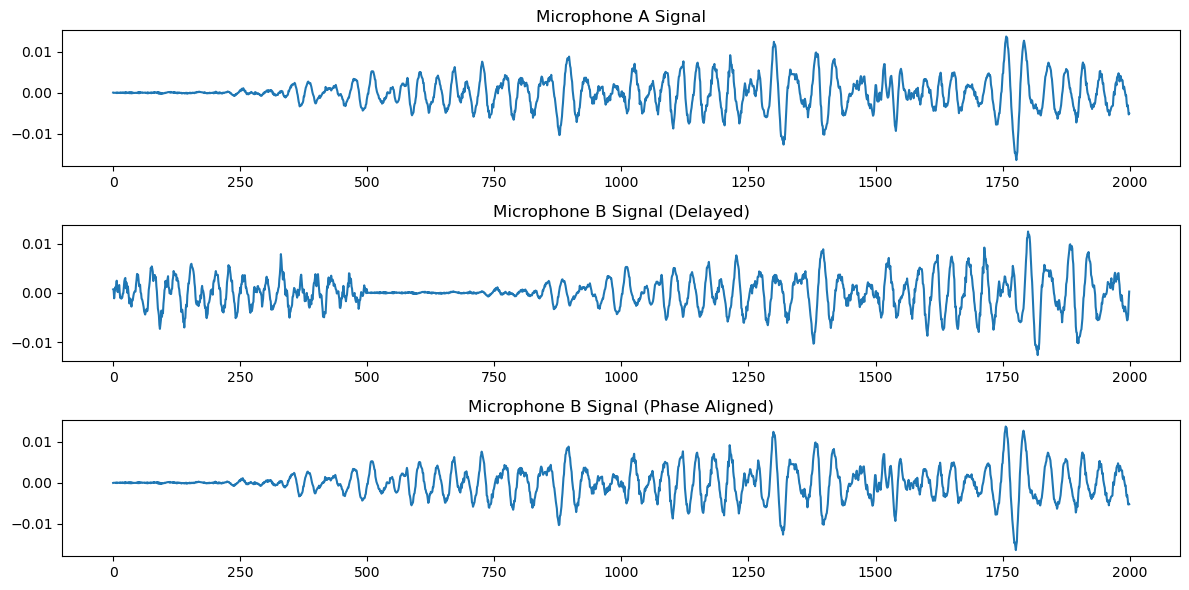

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
from scipy.signal import correlate
from IPython.display import Audio

# Load the audio file
# Load the audio file
folder_path = r'Bird_sound'
filename = "call1.wav"
file_path = os.path.join(folder_path, filename)

SR, z = wavfile.read(file_path)
# Play audio
Audio(z, rate=SR) 

# Normalised Audio
z = z / np.max(np.abs(z))
signal_A = z

#  Delay between microphoens
delay_samples = 500  
signal_B = np.roll(z, delay_samples)

# Unshifted Audio
print("Mic A Audio:")
Audio(signal_A, rate=SR)
display(Audio(signal_A, rate=SR))

print("Mic B Audio (Delayed):")
Audio(signal_B, rate=SR)
display(Audio(signal_B, rate=SR))

# FFT Calculation
fft_A = fft(signal_A)
fft_B = fft(signal_B)

# Phase difference between microphone A & B
phase_A = np.angle(fft_A)
phase_B = np.angle(fft_B)
phase_diff = phase_B - phase_A

# Crosscorrelation - similarities between A & B
cross_corr = correlate(signal_A, signal_B)
time_shift = np.argmax(cross_corr) - len(signal_A)
print(cross_corr.shape)
print(signal_A.shape)
print(signal_B.shape)
plt.figure(figsize=(12, 6))
plt.plot(cross_corr)
plt.xlim([len(signal_A) - 1000, len(signal_A) + 1000])


# Estimated Phase shift  
print(f"Estimated time shift (samples): {time_shift}")

time_shift_seconds = time_shift / SR
print(f"Estimated time shift: {time_shift_seconds:.6f} seconds")

# Adjusted Audio B 
fft_B_corrected = fft_B * np.exp(-1j * 2 * np.pi * time_shift * np.arange(len(signal_A)) / len(signal_A))
signal_B_corrected = np.real(ifft(fft_B_corrected))
print("Mic B Audio (Phase Aligned):")
Audio(signal_B_corrected, rate=SR)
display(Audio(signal_B_corrected, rate=SR))

# Plotting results
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.title("Microphone A Signal")
plt.plot(signal_A[:2000])

plt.subplot(3, 1, 2)
plt.title("Microphone B Signal (Delayed)")
plt.plot(signal_B[:2000])

plt.subplot(3, 1, 3)
plt.title("Microphone B Signal (Phase Aligned)")
plt.plot(signal_B_corrected[:2000])
plt.tight_layout()
plt.show()